In [2]:
pip install ucimlrepo

METADATA DU DATASET
{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Model

/tmp/ipython-input-2687229631.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


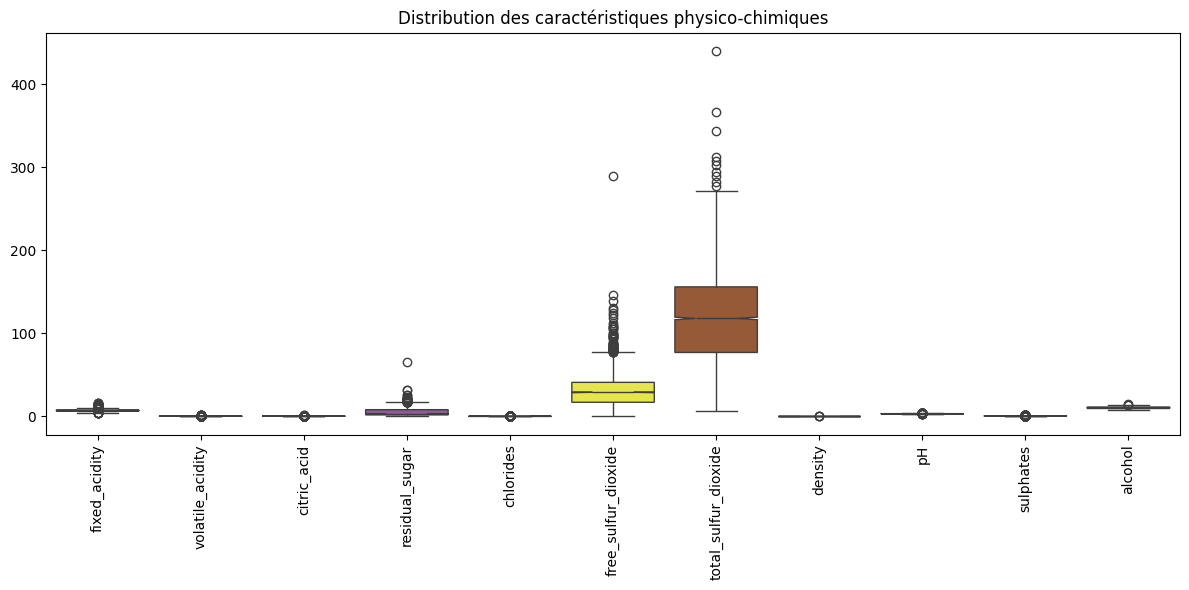

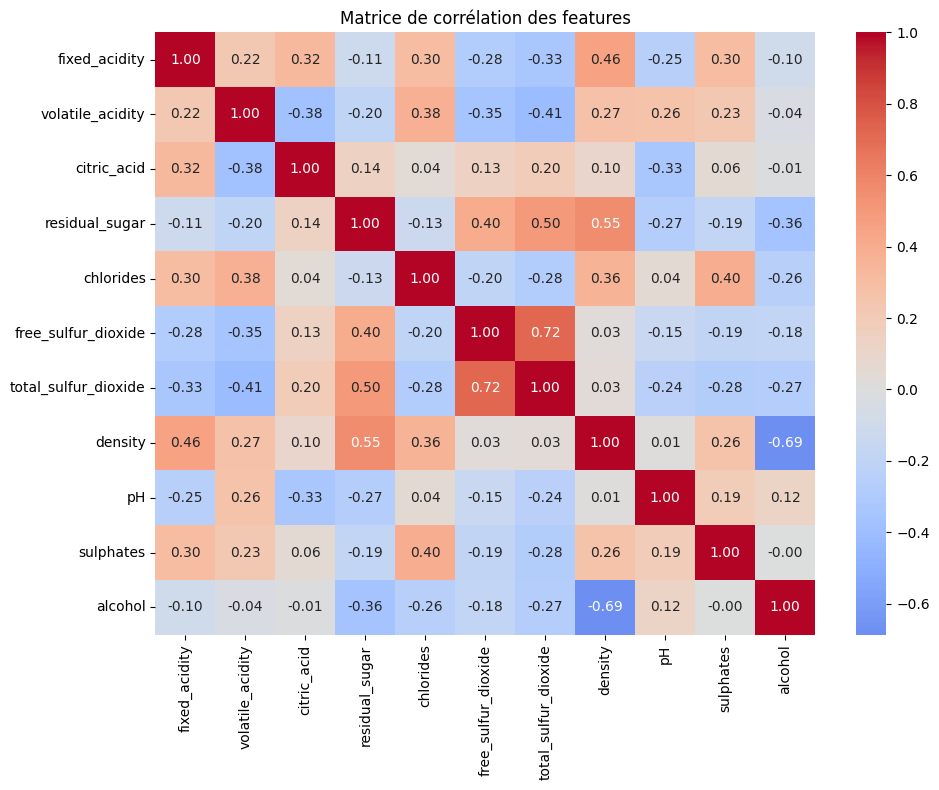

TAILLES DES ENSEMBLES
Training set: 2165 samples
Validation set: 2166 samples
Test set: 2166 samples


SECTION 2.2 - DONNÉES NON NORMALISÉES
Erreur de validation avec k=3: 0.3398 (Accuracy: 0.6602)


K optimal (non normalisé): 1
Erreur minimale de validation: 0.3329 (Accuracy: 0.6671)


Erreur sur le test set: 0.3278 (Accuracy: 0.6722)




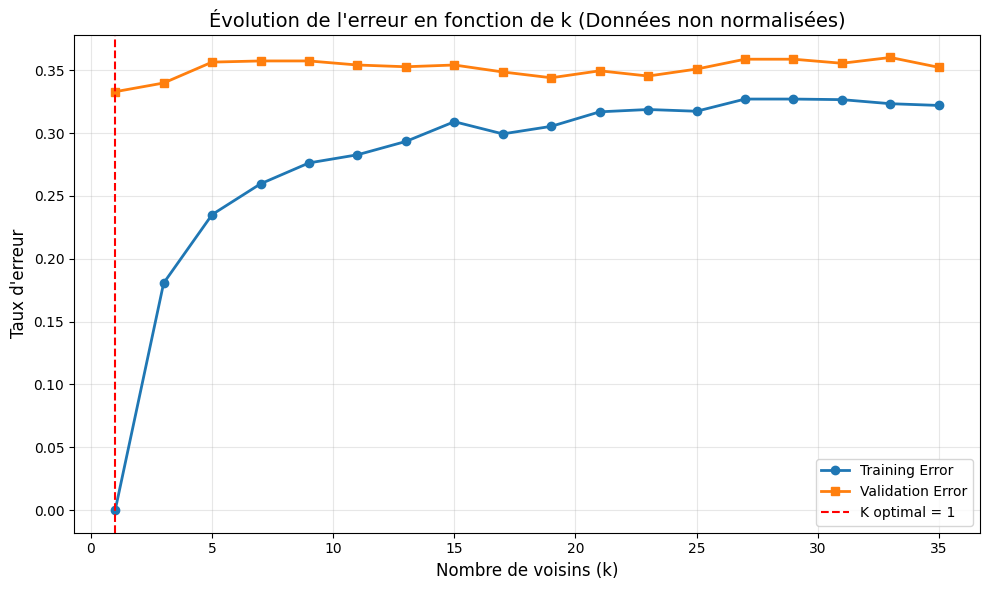

SECTION 2.3 - DONNÉES NORMALISÉES
K optimal (normalisé): 27
Erreur minimale de validation: 0.2470 (Accuracy: 0.7530)


Erreur sur le test set: 0.2567 (Accuracy: 0.7433)




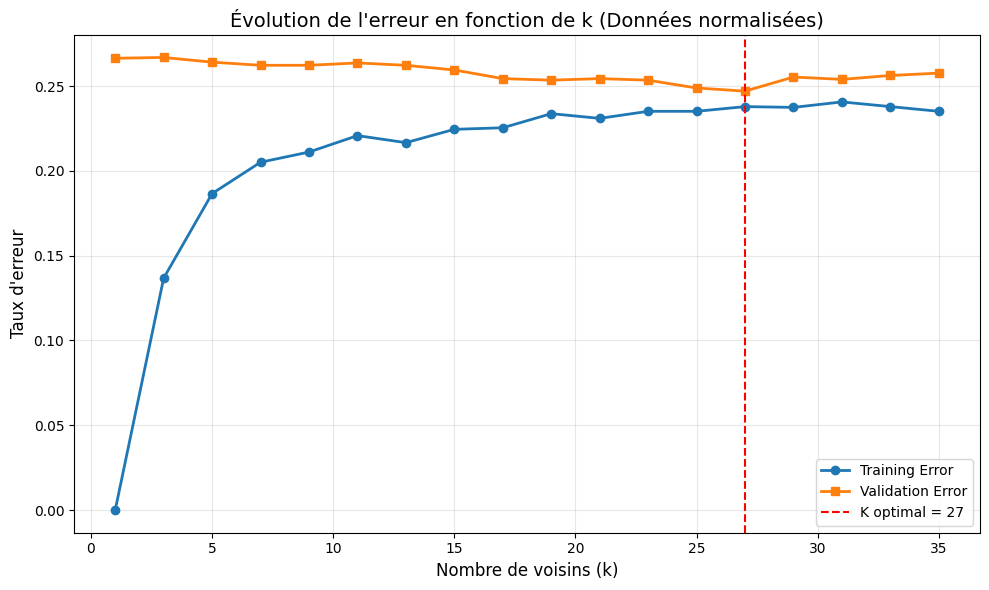

COMPARAISON DES PERFORMANCES
           Métrique Non normalisé Normalisé
          K optimal             1        27
  Erreur validation        0.3329    0.2470
Accuracy validation        0.6671    0.7530
        Erreur test        0.3278    0.2567
      Accuracy test        0.6722    0.7433


Amélioration de l'erreur de validation: 25.80%
Amélioration de l'erreur de test: 21.69%




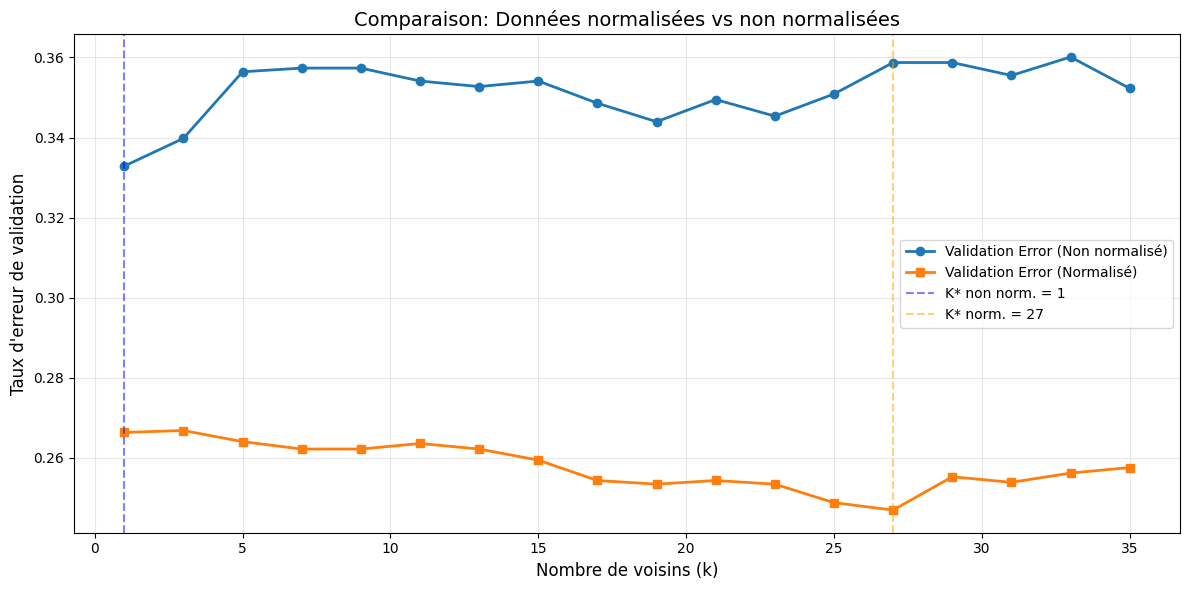

SECTION 3 - RÉDUCTION DE LA SENSIBILITÉ AU SPLIT
Méthode 1: K-Fold Cross-Validation (k=5)
------------------------------------------------------------
k= 3: Accuracy moyenne = 0.6714 (±0.0138)
k= 5: Accuracy moyenne = 0.6645 (±0.0153)
k= 7: Accuracy moyenne = 0.6689 (±0.0141)
k= 9: Accuracy moyenne = 0.6627 (±0.0139)
k=11: Accuracy moyenne = 0.6654 (±0.0076)
k=15: Accuracy moyenne = 0.6650 (±0.0059)
k=19: Accuracy moyenne = 0.6710 (±0.0114)
k=23: Accuracy moyenne = 0.6629 (±0.0056)

K optimal (cross-validation): 3
Meilleure accuracy: 0.6714


Performance finale sur le test set: 0.7525


Méthode 2: Multiple Random Splits (30 itérations)
------------------------------------------------------------
Accuracy moyenne sur 30 splits: 0.7553 (±0.0087)
Accuracy minimale: 0.7392
Accuracy maximale: 0.7715




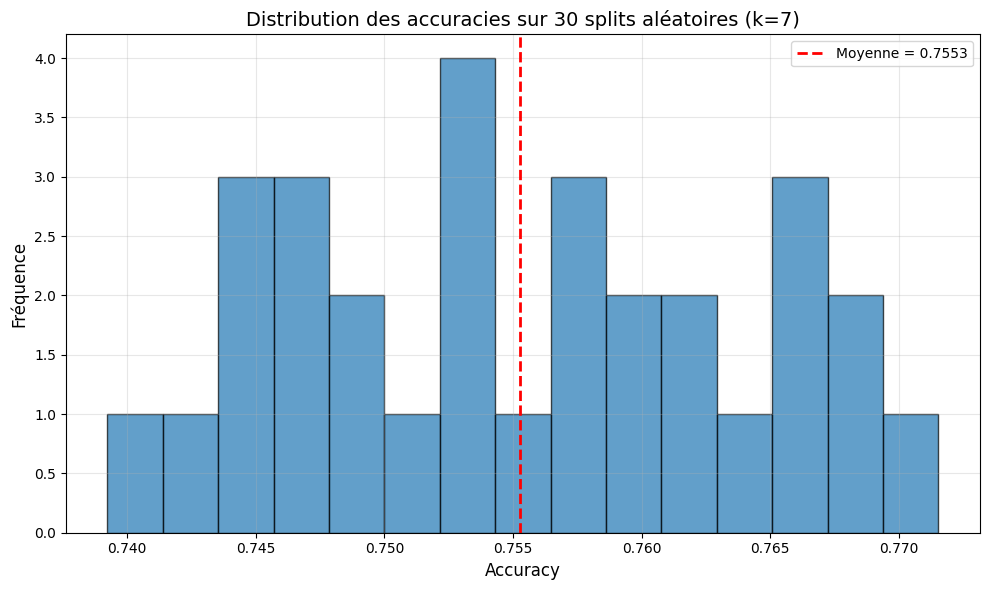

RÉSUMÉ FINAL DES RÉSULTATS

1. DATASET:
   - Taille totale: 6497 échantillons
   - Features: 11 variables physico-chimiques
   - Classes: 2 (mauvais vin ≤5, bon vin >5)

2. PERFORMANCES SANS NORMALISATION:
   - K optimal: 1
   - Accuracy validation: 0.6671
   - Accuracy test: 0.6722

3. PERFORMANCES AVEC NORMALISATION:
   - K optimal: 27
   - Accuracy validation: 0.7530
   - Accuracy test: 0.7433
   - Amélioration: 25.80% sur validation, 21.69% sur test

4. ROBUSTESSE (CROSS-VALIDATION):
   - K optimal (CV): 3
   - Accuracy test: 0.7525
   - Accuracy moyenne (30 splits): 0.7553 (±0.0087)

CONCLUSION:
La normalisation améliore significativement les performances du modèle KNN.
La cross-validation permet de réduire la sensibilité au split des données et
fournit une estimation plus fiable de la performance du modèle.



In [3]:
# -*- coding: utf-8 -*-
"""
Analyse de la base de données Wine Quality
Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality
"""

!pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# ========================================
# 1. CHARGEMENT DES DONNÉES
# ========================================

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Data (as pandas dataframes)
X = wine_quality.data.features
Y = wine_quality.data.targets

# Metadata
print("=" * 60)
print("METADATA DU DATASET")
print("=" * 60)
print(wine_quality.metadata)
print("\n")

# Variable information
print("=" * 60)
print("INFORMATIONS SUR LES VARIABLES")
print("=" * 60)
print(wine_quality.variables)
print("\n")

# Créer un dataframe complet
df = pd.concat([X, Y], axis=1)

# ========================================
# 2. PRÉPARATION DES DONNÉES
# ========================================

X = df.drop("quality", axis=1)  # Features
Y = df["quality"]  # Target

print("=" * 60)
print("DISTRIBUTION DES QUALITÉS DE VIN")
print("=" * 60)
print(Y.value_counts().sort_index())
print("\n")

# Classification binaire: mauvais vin (y=0) si quality <= 5, bon vin (y=1) sinon
Y = [0 if val <= 5 else 1 for val in Y]
print("Distribution après binarisation:")
print(f"Mauvais vins (quality <= 5): {Y.count(0)}")
print(f"Bons vins (quality > 5): {Y.count(1)}")
print("\n")

# ========================================
# 3. VISUALISATION DES DONNÉES
# ========================================

# Boxplots des features
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.boxplot(data=X, orient="v", palette="Set1", width=0.8, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Distribution des caractéristiques physico-chimiques")
plt.tight_layout()
plt.savefig('boxplots_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des features")
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 4. SPLIT DES DONNÉES
# ========================================

# Premier split: Training+Validation (2/3) et Test (1/3)
Xa_temp, Xt, Ya_temp, Yt = train_test_split(
    X, Y, shuffle=True, test_size=1/3, stratify=Y, random_state=42
)

# Second split: Training (1/3) et Validation (1/3)
Xa, Xv, Ya, Yv = train_test_split(
    Xa_temp, Ya_temp, shuffle=True, test_size=0.5, stratify=Ya_temp, random_state=42
)

print("=" * 60)
print("TAILLES DES ENSEMBLES")
print("=" * 60)
print(f"Training set: {len(Xa)} samples")
print(f"Validation set: {len(Xv)} samples")
print(f"Test set: {len(Xt)} samples")
print("\n")

# ========================================
# 5. SECTION 2.2 - MODÈLE SANS NORMALISATION
# ========================================

print("=" * 60)
print("SECTION 2.2 - DONNÉES NON NORMALISÉES")
print("=" * 60)

# Test avec k=3
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xa, Ya)

Ypred_v = clf.predict(Xv)
error_v = 1 - accuracy_score(Yv, Ypred_v)
print(f"Erreur de validation avec k={k}: {error_v:.4f} (Accuracy: {1-error_v:.4f})")
print("\n")

# Recherche du k optimal
k_vector = np.arange(1, 37, 2)
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

# K optimal
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print(f"K optimal (non normalisé): {k_star}")
print(f"Erreur minimale de validation: {err_min:.4f} (Accuracy: {1-err_min:.4f})")
print("\n")

# Évaluation sur le test set avec k*
clf_best = KNeighborsClassifier(n_neighbors=k_star)
clf_best.fit(Xa, Ya)
Ypred_test = clf_best.predict(Xt)
error_test = 1 - accuracy_score(Yt, Ypred_test)
print(f"Erreur sur le test set: {error_test:.4f} (Accuracy: {1-error_test:.4f})")
print("\n")

# Visualisation des courbes d'erreur
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train, 'o-', label='Training Error', linewidth=2)
plt.plot(k_vector, error_val, 's-', label='Validation Error', linewidth=2)
plt.axvline(x=k_star, color='r', linestyle='--', label=f'K optimal = {k_star}')
plt.xlabel('Nombre de voisins (k)', fontsize=12)
plt.ylabel('Taux d\'erreur', fontsize=12)
plt.title('Évolution de l\'erreur en fonction de k (Données non normalisées)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('error_curves_non_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 6. SECTION 2.3 - MODÈLE AVEC NORMALISATION
# ========================================

print("=" * 60)
print("SECTION 2.3 - DONNÉES NORMALISÉES")
print("=" * 60)

# Normalisation des données
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(Xa)

Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)

# Recherche du k optimal avec données normalisées
error_train_n = np.empty(k_vector.shape)
error_val_n = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa_n, Ya)

    Ypred_train = clf.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_val = clf.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_val)

# K optimal normalisé
err_min_n, ind_opt_n = error_val_n.min(), error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"K optimal (normalisé): {k_star_n}")
print(f"Erreur minimale de validation: {err_min_n:.4f} (Accuracy: {1-err_min_n:.4f})")
print("\n")

# Évaluation sur le test set avec k* normalisé
clf_best_n = KNeighborsClassifier(n_neighbors=k_star_n)
clf_best_n.fit(Xa_n, Ya)
Ypred_test_n = clf_best_n.predict(Xt_n)
error_test_n = 1 - accuracy_score(Yt, Ypred_test_n)
print(f"Erreur sur le test set: {error_test_n:.4f} (Accuracy: {1-error_test_n:.4f})")
print("\n")

# Visualisation des courbes d'erreur normalisées
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train_n, 'o-', label='Training Error', linewidth=2)
plt.plot(k_vector, error_val_n, 's-', label='Validation Error', linewidth=2)
plt.axvline(x=k_star_n, color='r', linestyle='--', label=f'K optimal = {k_star_n}')
plt.xlabel('Nombre de voisins (k)', fontsize=12)
plt.ylabel('Taux d\'erreur', fontsize=12)
plt.title('Évolution de l\'erreur en fonction de k (Données normalisées)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('error_curves_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 7. COMPARAISON NORMALISÉ VS NON NORMALISÉ
# ========================================

print("=" * 60)
print("COMPARAISON DES PERFORMANCES")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Métrique': ['K optimal', 'Erreur validation', 'Accuracy validation',
                 'Erreur test', 'Accuracy test'],
    'Non normalisé': [k_star, f'{err_min:.4f}', f'{1-err_min:.4f}',
                      f'{error_test:.4f}', f'{1-error_test:.4f}'],
    'Normalisé': [k_star_n, f'{err_min_n:.4f}', f'{1-err_min_n:.4f}',
                  f'{error_test_n:.4f}', f'{1-error_test_n:.4f}']
})

print(comparison_df.to_string(index=False))
print("\n")

# Amélioration en pourcentage
improvement = ((err_min - err_min_n) / err_min) * 100
print(f"Amélioration de l'erreur de validation: {improvement:.2f}%")
improvement_test = ((error_test - error_test_n) / error_test) * 100
print(f"Amélioration de l'erreur de test: {improvement_test:.2f}%")
print("\n")

# Graphique de comparaison
plt.figure(figsize=(12, 6))
plt.plot(k_vector, error_val, 'o-', label='Validation Error (Non normalisé)', linewidth=2)
plt.plot(k_vector, error_val_n, 's-', label='Validation Error (Normalisé)', linewidth=2)
plt.axvline(x=k_star, color='blue', linestyle='--', alpha=0.5, label=f'K* non norm. = {k_star}')
plt.axvline(x=k_star_n, color='orange', linestyle='--', alpha=0.5, label=f'K* norm. = {k_star_n}')
plt.xlabel('Nombre de voisins (k)', fontsize=12)
plt.ylabel('Taux d\'erreur de validation', fontsize=12)
plt.title('Comparaison: Données normalisées vs non normalisées', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparison_normalized_vs_non_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 8. CROSS-VALIDATION POUR RÉDUIRE LA SENSIBILITÉ AU SPLIT
# ========================================

print("=" * 60)
print("SECTION 3 - RÉDUCTION DE LA SENSIBILITÉ AU SPLIT")
print("=" * 60)

from sklearn.model_selection import cross_val_score, KFold

# Combiner training et validation pour la cross-validation
X_train_full = pd.concat([pd.DataFrame(Xa, columns=X.columns),
                           pd.DataFrame(Xv, columns=X.columns)], axis=0)
Y_train_full = Ya + Yv

print("Méthode 1: K-Fold Cross-Validation (k=5)")
print("-" * 60)

# Test avec différentes valeurs de k
k_values_cv = [3, 5, 7, 9, 11, 15, 19, 23]
cv_scores = []

for k in k_values_cv:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train_full, Y_train_full, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k:2d}: Accuracy moyenne = {scores.mean():.4f} (±{scores.std():.4f})")

# K optimal avec cross-validation
best_k_cv = k_values_cv[np.argmax(cv_scores)]
print(f"\nK optimal (cross-validation): {best_k_cv}")
print(f"Meilleure accuracy: {max(cv_scores):.4f}")
print("\n")

# Entraîner le modèle final avec le k optimal
clf_final = KNeighborsClassifier(n_neighbors=best_k_cv)

# Normaliser toutes les données
sc_final = StandardScaler()
X_train_full_n = sc_final.fit_transform(X_train_full)
Xt_final_n = sc_final.transform(Xt)

clf_final.fit(X_train_full_n, Y_train_full)
Ypred_final = clf_final.predict(Xt_final_n)
accuracy_final = accuracy_score(Yt, Ypred_final)

print(f"Performance finale sur le test set: {accuracy_final:.4f}")
print("\n")

# Méthode 2: Multiple Random Splits
print("Méthode 2: Multiple Random Splits (30 itérations)")
print("-" * 60)

n_iterations = 30
k_test = 7  # Valeur de k à tester

accuracies_splits = []

for i in range(n_iterations):
    X_temp, X_test_split, Y_temp, Y_test_split = train_test_split(
        X, Y, test_size=0.2, stratify=Y, random_state=i
    )

    # Normalisation
    scaler = StandardScaler()
    X_temp_n = scaler.fit_transform(X_temp)
    X_test_split_n = scaler.transform(X_test_split)

    # Entraînement et évaluation
    clf_split = KNeighborsClassifier(n_neighbors=k_test)
    clf_split.fit(X_temp_n, Y_temp)
    y_pred = clf_split.predict(X_test_split_n)
    accuracies_splits.append(accuracy_score(Y_test_split, y_pred))

mean_accuracy = np.mean(accuracies_splits)
std_accuracy = np.std(accuracies_splits)

print(f"Accuracy moyenne sur {n_iterations} splits: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
print(f"Accuracy minimale: {min(accuracies_splits):.4f}")
print(f"Accuracy maximale: {max(accuracies_splits):.4f}")
print("\n")

# Visualisation de la distribution des accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracies_splits, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(x=mean_accuracy, color='r', linestyle='--', linewidth=2,
            label=f'Moyenne = {mean_accuracy:.4f}')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title(f'Distribution des accuracies sur {n_iterations} splits aléatoires (k={k_test})', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('multiple_splits_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 9. RÉSUMÉ FINAL
# ========================================

print("=" * 60)
print("RÉSUMÉ FINAL DES RÉSULTATS")
print("=" * 60)

summary = f"""
1. DATASET:
   - Taille totale: {len(df)} échantillons
   - Features: {X.shape[1]} variables physico-chimiques
   - Classes: 2 (mauvais vin ≤5, bon vin >5)

2. PERFORMANCES SANS NORMALISATION:
   - K optimal: {k_star}
   - Accuracy validation: {1-err_min:.4f}
   - Accuracy test: {1-error_test:.4f}

3. PERFORMANCES AVEC NORMALISATION:
   - K optimal: {k_star_n}
   - Accuracy validation: {1-err_min_n:.4f}
   - Accuracy test: {1-error_test_n:.4f}
   - Amélioration: {improvement:.2f}% sur validation, {improvement_test:.2f}% sur test

4. ROBUSTESSE (CROSS-VALIDATION):
   - K optimal (CV): {best_k_cv}
   - Accuracy test: {accuracy_final:.4f}
   - Accuracy moyenne ({n_iterations} splits): {mean_accuracy:.4f} (±{std_accuracy:.4f})

CONCLUSION:
La normalisation améliore significativement les performances du modèle KNN.
La cross-validation permet de réduire la sensibilité au split des données et
fournit une estimation plus fiable de la performance du modèle.
"""

print(summary)